In [1]:
directory_path = r"C:\Users\Anime\Downloads\soul_ai\dataset"

this is expalined in the code of image_analysis.ipynb

In [4]:
import os
import random

def get_random_image_path(directory_path):
    list_of_targeted_folders = ['Email', 'Letter', 'Memo', 'News',  'Resume', 'Scientific']

    image_extensions = ['.jpg', '.jpeg']

    # Randomly select a folder
    random_folder = random.choice(list_of_targeted_folders)
    folder_path = os.path.join(directory_path, random_folder)

    # List to store all image paths in the randomly selected folder
    folder_image_paths = []

    # Iterate over all files in the folder
    for filename in os.listdir(folder_path):
        # Check if the file is an image
        if os.path.splitext(filename)[1].lower() in image_extensions:
            image_path = os.path.join(folder_path, filename)
            folder_image_paths.append(image_path)

    # Check if there are any images in the folder
    if folder_image_paths:
        # Randomly select an image
        random_image_path = random.choice(folder_image_paths)
        return random_image_path
    else:
        return None


this is a util function to view image in the notebook

In [6]:
import matplotlib.pyplot as plt
#https://stackoverflow.com/questions/28816046/
#displaying-different-images-with-actual-size-in-matplotlib-subplot
# this code dispay the image in the origanl dimenstions 
def display(im_path):
    dpi = 80
    im_data = plt.imread(im_path)

    height, width  = im_data.shape[:2]
    
    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    # Hide spines, ticks, etc.
    ax.axis('off')

    # Display the image.
    ax.imshow(im_data, cmap='gray')

    plt.show()

Randonly selected image is C:\Users\Anime\Downloads\soul_ai\dataset\Letter\94002714.jpg


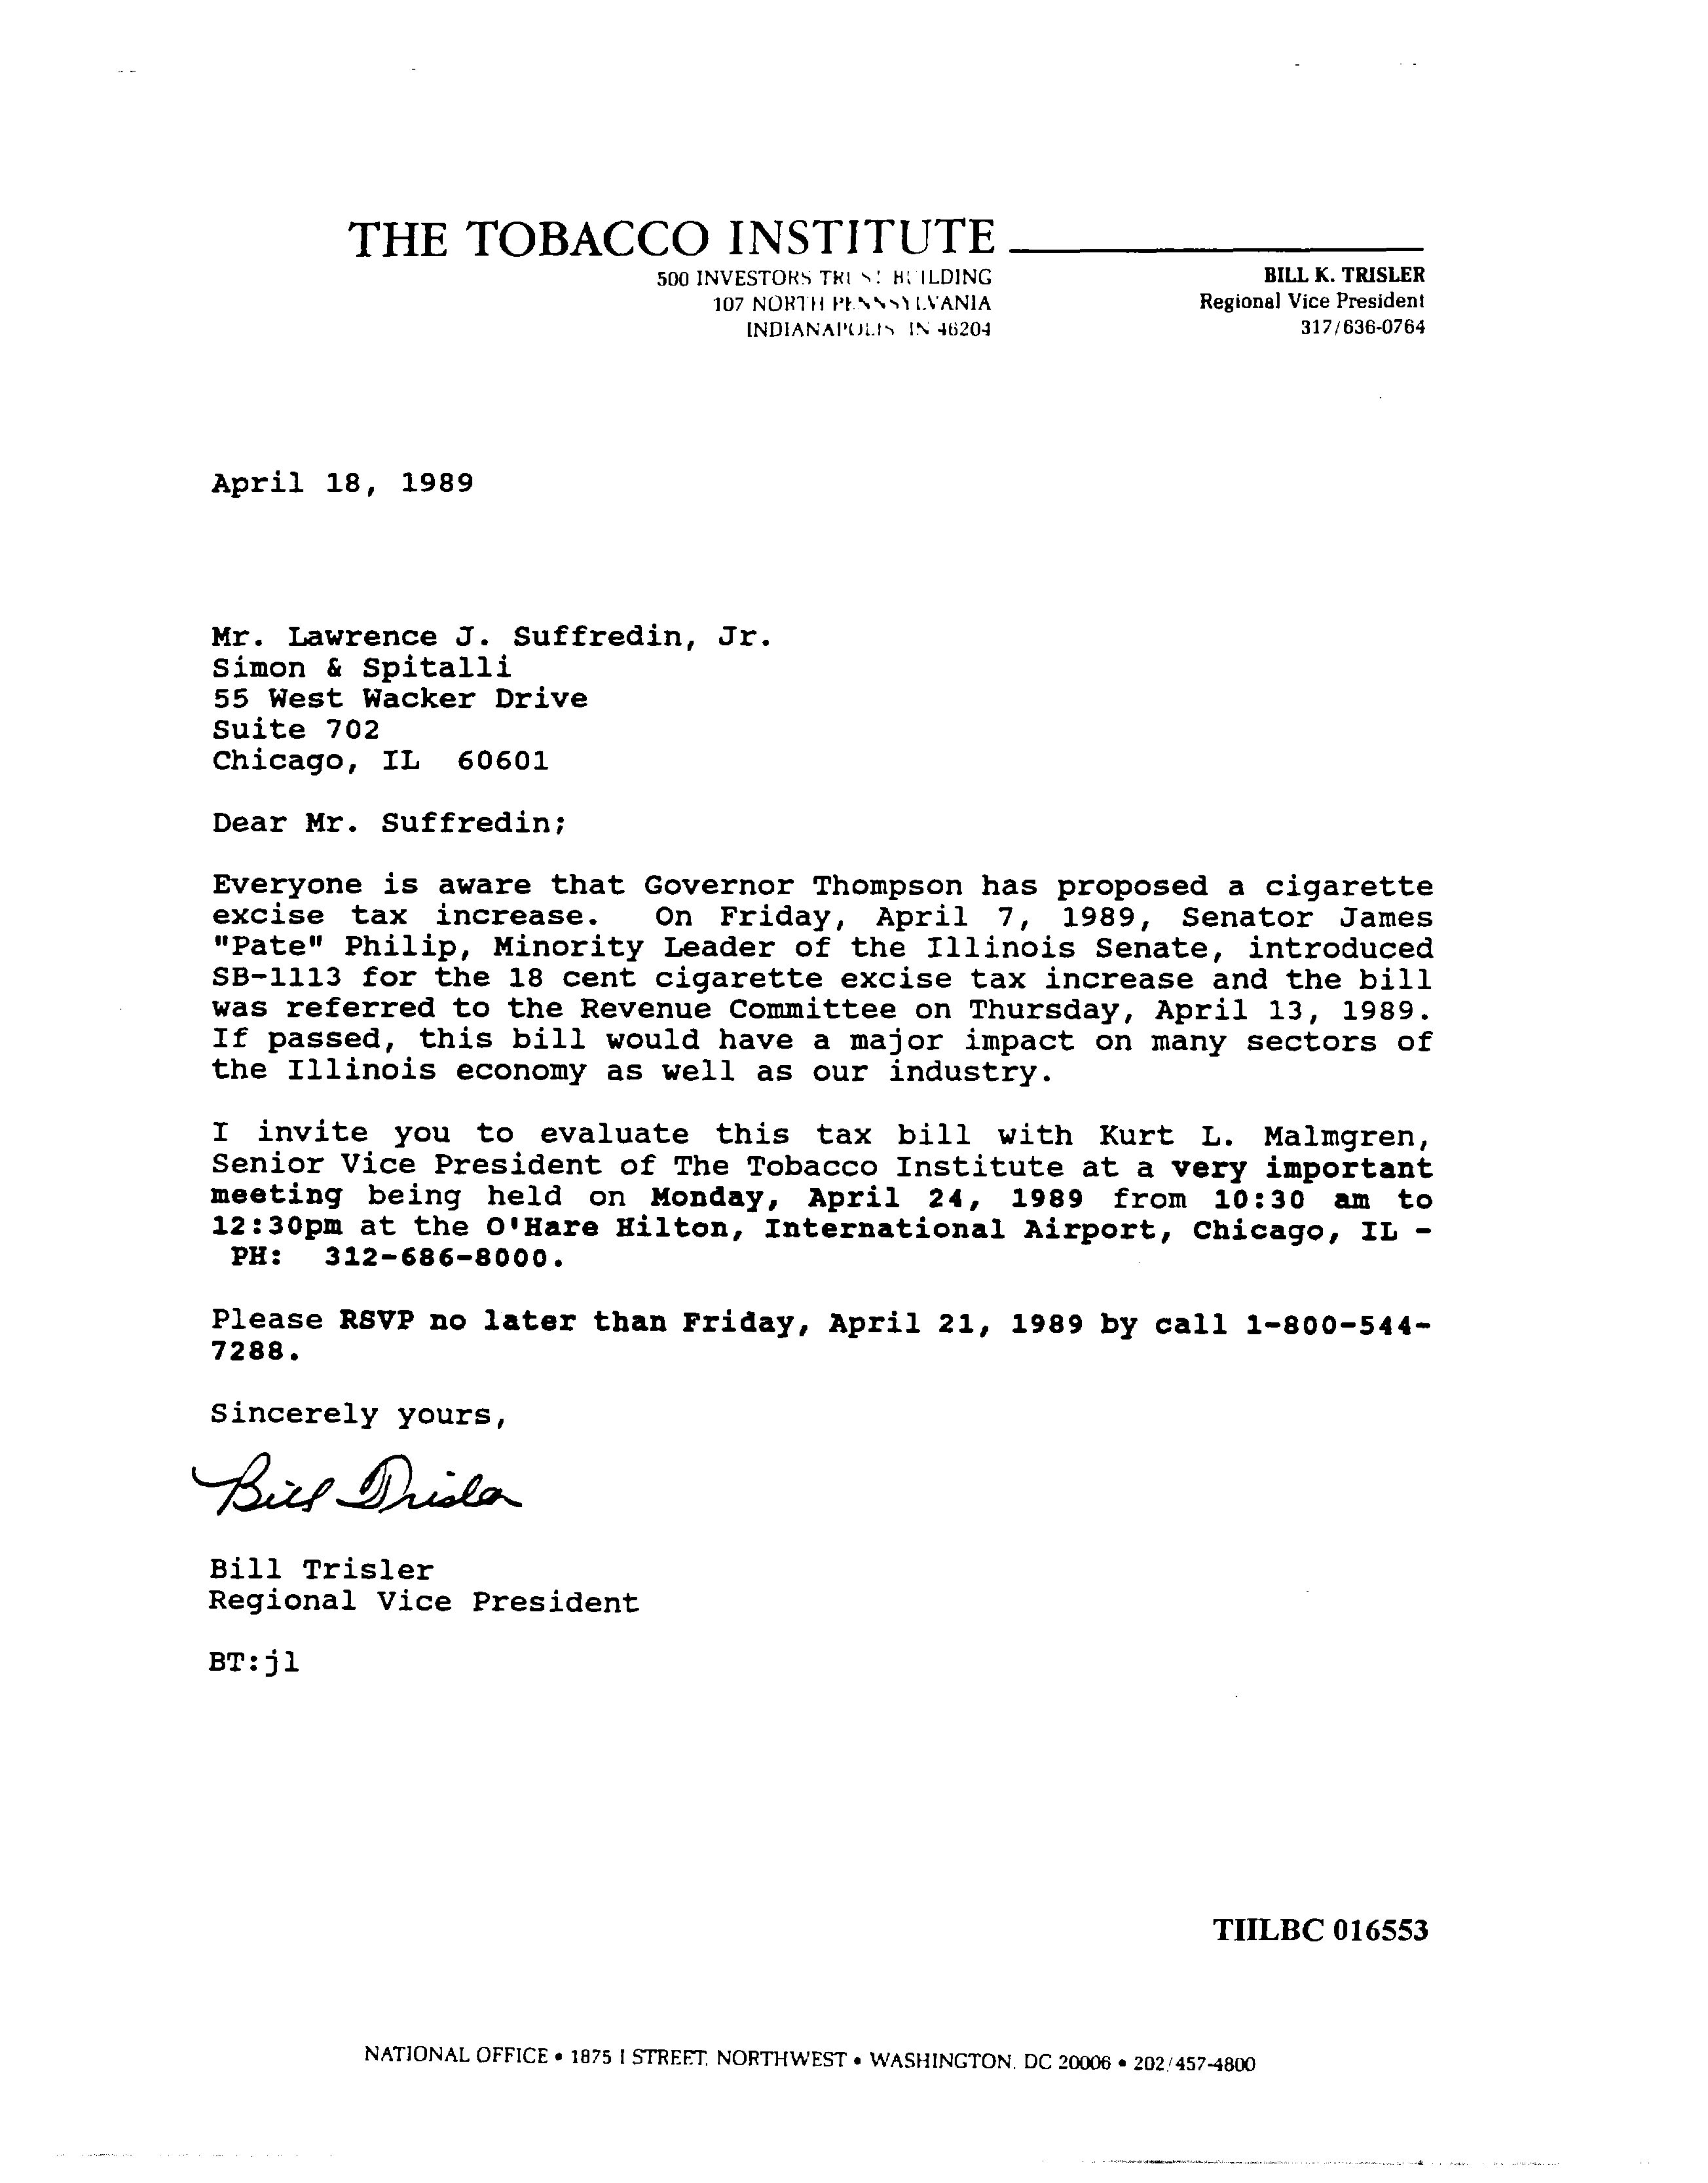

In [7]:
image_path = get_random_image_path(directory_path)

print(f"Randonly selected image is {image_path}")
display(image_path)



This is the  function to veiw that there if there any type of image that is better for the than the original one then we can use that time if that imgae is visually better

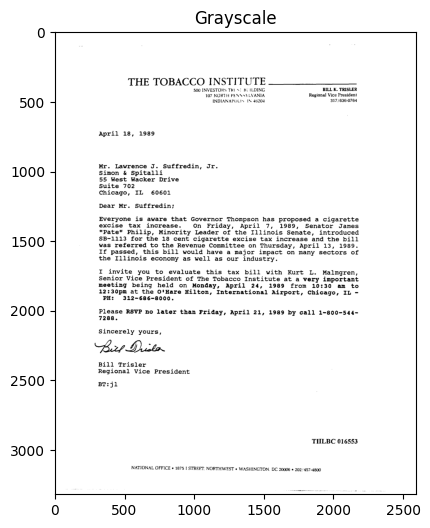

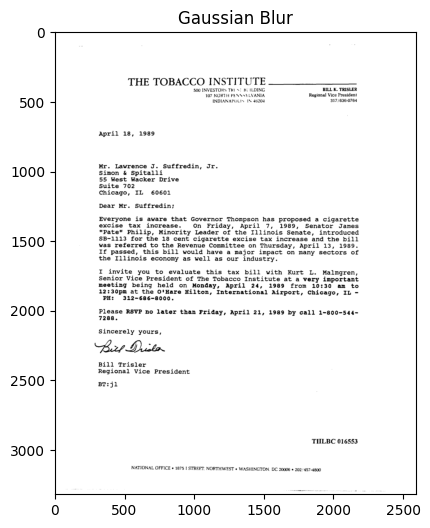

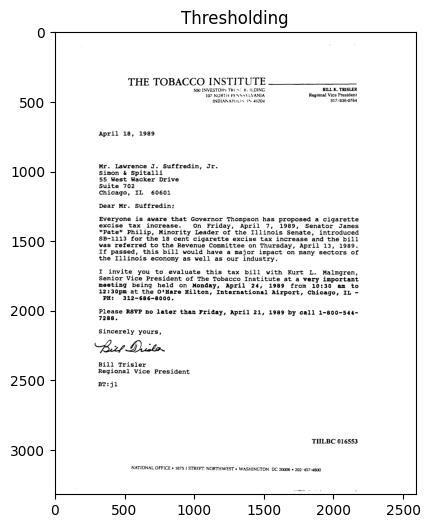

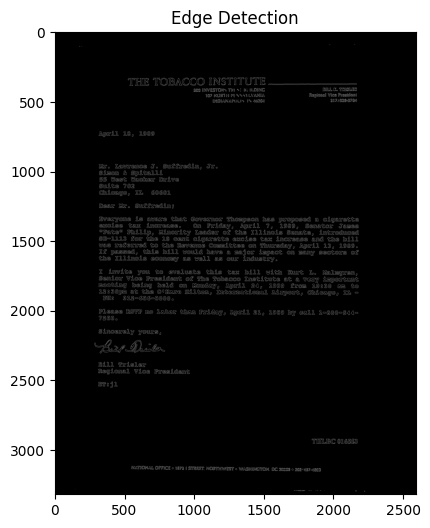

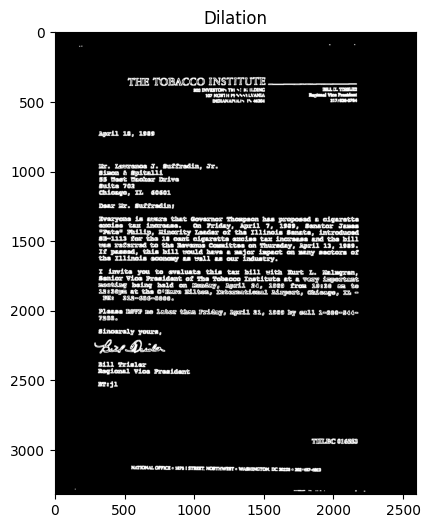

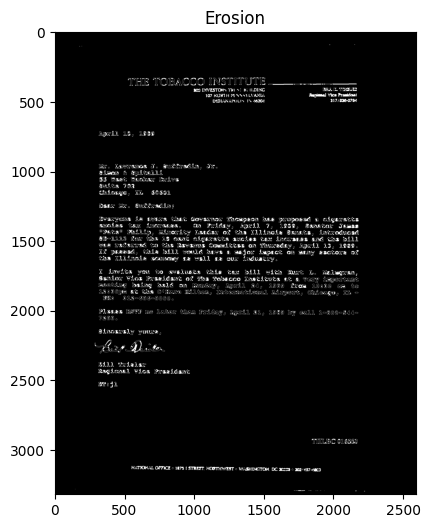

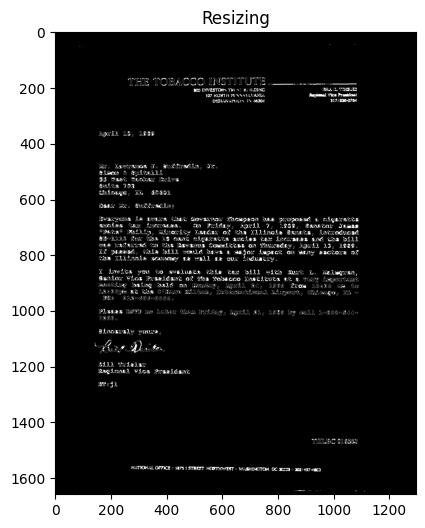

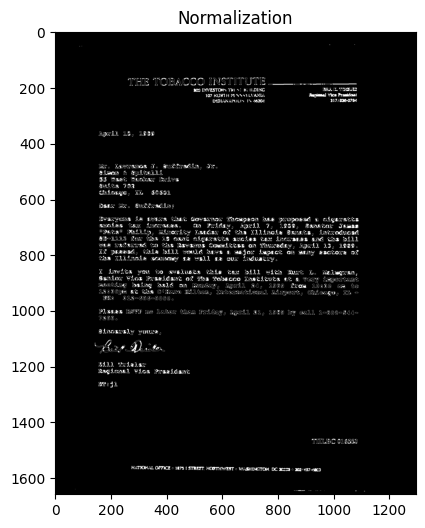

In [8]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image
image_path = image_path
image = cv2.imread(image_path)

def show_image(title, image):
    plt.figure(figsize=(6, 6))
    plt.title(title)
    plt.imshow(image, cmap='gray')
    plt.show()

# Grayscale Conversion
def convert_to_grayscale(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    show_image('Grayscale', gray)
    return gray

# Gaussian Blur
def apply_gaussian_blur(image):
    blurred = cv2.GaussianBlur(image, (5, 5), 0)
    show_image('Gaussian Blur', blurred)
    return blurred

# Thresholding
def apply_thresholding(image):
    _, thresholded = cv2.threshold(image, 150, 255, cv2.THRESH_BINARY)
    show_image('Thresholding', thresholded)
    return thresholded

# Edge Detection
def detect_edges(image):
    edges = cv2.Canny(image, 100, 200)
    show_image('Edge Detection', edges)
    return edges

# Dilation
def apply_dilation(image):
    kernel = np.ones((5, 5), np.uint8)
    dilated = cv2.dilate(image, kernel, iterations=1)
    show_image('Dilation', dilated)
    return dilated

# Erosion
def apply_erosion(image):
    kernel = np.ones((5, 5), np.uint8)
    eroded = cv2.erode(image, kernel, iterations=1)
    show_image('Erosion', eroded)
    return eroded

# Resizing
def resize_image(image, scale_x=0.5, scale_y=0.5):
    resized = cv2.resize(image, (0, 0), fx=scale_x, fy=scale_y)
    show_image('Resizing', resized)
    return resized

# Normalization
def normalize_image(image):
    normalized = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX)
    show_image('Normalization', normalized)
    return normalized

# Example usage:
gray_image = convert_to_grayscale(image)
blurred_image = apply_gaussian_blur(gray_image)
thresholded_image = apply_thresholding(blurred_image)
edges_image = detect_edges(thresholded_image)
dilated_image = apply_dilation(edges_image)
eroded_image = apply_erosion(dilated_image)
resized_image = resize_image(eroded_image)
normalized_image = normalize_image(resized_image)


here's a decorator function that measures the time it takes to run a function

In [11]:
import time

def time_it(func):
    def wrapper(*args, **kwargs):
        start_time = time.time()
        result = func(*args, **kwargs)
        end_time = time.time()
        elapsed_time = end_time - start_time
        print(f'Function {func.__name__} took {elapsed_time:.6f} seconds to run')
        return result
    return wrapper


lets get the big guns the langchain to extract the images , these thing are on the very upper level i have to complete the task by this 30 thats why i am not gooing very deep as my goal is to show my wokring process and the buildinging capabiliies
this is from the lanchain_image.ipynb

In [21]:
from langchain_community.document_loaders.image import UnstructuredImageLoader
@time_it
def get_image_langchain_content(image_path):
    # Create an instance of the UnstructuredImageLoader class with the image path
    loader = UnstructuredImageLoader(image_path)

    # Load the image data using the load() method of the UnstructuredImageLoader instance
    data = loader.load()

    # Extract the content of the image from the loaded data
    image_content = data[0].page_content

    # Return the content of the image
    return image_content


In [22]:
image_path = image_path  # replace with your image path
image_content = get_image_langchain_content(r"C:\Users\Anime\Downloads\soul_ai\dataset\Resume\0000153377.jpg")



Function get_image_langchain_content took 2.495688 seconds to run


Function get_image_langchain_content took 2.495688 seconds to run

In [16]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

@time_it
def preprocess_text(text):
    # 1. Tokenization
    words = nltk.word_tokenize(text)

    # 2. Lowercasing
    words = [word.lower() for word in words]

    # 3. Removing Punctuation
    words = [word for word in words if word.isalnum()]

    # 4. Removing Stop Words
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    # 5. Stemming
    stemmer = PorterStemmer()
    stemmed_words = [stemmer.stem(word) for word in words]

    # 6. Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in stemmed_words]

    # Join processed words into a single string
    processed_text = ' '.join(lemmatized_words)

    return processed_text


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Anime\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Anime\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Anime\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [17]:
processed_text = preprocess_text(image_content)
print(processed_text)

Function preprocess_text took 1.191755 seconds to run
tobacco institut 500 investor tri hi ild 107 north pennsylvania indianaiuit 46204 bill trisler region vice presid april 18 1989 lawrenc suffredin simon spital 55 west wacker drive suit 702 chicago il 60601 dear suffredin everyon awar governor thompson propos cigarett excis tax increas friday april 7 1989 senat jame pate philip minor leader illinoi senat introduc 18 cent cigarett excis tax increas bill refer revenu committe thursday april 13 1989 pas bill would major impact mani sector illinoi economi well industri invit evalu tax bill kurt malmgren senior vice presid tobacco institut import meet held monday april 24 1989 hilton intern airport chicago il ph plea rsvp later friday april 21 1989 call 7288 sincer bill trisler region vice presid bt j1 tiilbc 016553 nation offic 1875 1 street northwest washington dc 20006
